In [3]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

## Задание 1

In [140]:
data = pd.read_csv('dataset_16', sep='\t', header=None)

In [141]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,10,43,5825543,69,60,0,1407606829,0,-24,вс,0,1414776005,-,424668,-,3.0
1,2,1,334,129,31,112227,2,1,1415699671,0,-29,пн,0,1386786500,86401,1274004,1415714518,21.0
2,2,1,1,5,5825543,315,25219,1,1415428541,0,-26,пн,0,1415612168,-,49380,-,16.0
3,1,1,422,2,5825543,392,44,1,1411245251,0,22,вс,0,1379156172,-,19752,-,20.0
4,1,1,0,580,7699829,500,161068,1,1354122839,0,26,вс,0,1415715882,3,5728080,1415715885,18.0


Избавимся от тектовых признаков 

In [142]:
non_text_column = data.iloc[:,11]
non_text_column[non_text_column == 'пн'] = 1
non_text_column[non_text_column == 'вт'] = 2
non_text_column[non_text_column == 'ср'] = 3
non_text_column[non_text_column == 'чт'] = 4
non_text_column[non_text_column == 'пт'] = 5
non_text_column[non_text_column == 'сб'] = 6
non_text_column[non_text_column == 'вс'] = 7
data.iloc[:,11] = non_text_column.astype(int)

In [143]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,10,43,5825543,69,60,0,1407606829,0,-24,7,0,1414776005,-,424668,-,3.0
1,2,1,334,129,31,112227,2,1,1415699671,0,-29,1,0,1386786500,86401,1274004,1415714518,21.0
2,2,1,1,5,5825543,315,25219,1,1415428541,0,-26,1,0,1415612168,-,49380,-,16.0
3,1,1,422,2,5825543,392,44,1,1411245251,0,22,7,0,1379156172,-,19752,-,20.0
4,1,1,0,580,7699829,500,161068,1,1354122839,0,26,7,0,1415715882,3,5728080,1415715885,18.0


Можно заметить, что не все столбцы имеют хорошие типы - некоторые из них имеют тип object, что плохо для подчета корреляций. Это столбцы с пропущенными значениеми.

In [11]:
for i, column in enumerate(data.columns):
    print('Count of unique elements in {} column = {}'.format(column, data.iloc[:,i].dtype))

Count of unique elements in 0 column = int64
Count of unique elements in 1 column = int64
Count of unique elements in 2 column = object
Count of unique elements in 3 column = int64
Count of unique elements in 4 column = int64
Count of unique elements in 5 column = int64
Count of unique elements in 6 column = int64
Count of unique elements in 7 column = int64
Count of unique elements in 8 column = int64
Count of unique elements in 9 column = int64
Count of unique elements in 10 column = int64
Count of unique elements in 11 column = int64
Count of unique elements in 12 column = int64
Count of unique elements in 13 column = int64
Count of unique elements in 14 column = object
Count of unique elements in 15 column = int64
Count of unique elements in 16 column = object
Count of unique elements in 17 column = float64


Сначала посмотрим на корреляции, полученные по всем данным

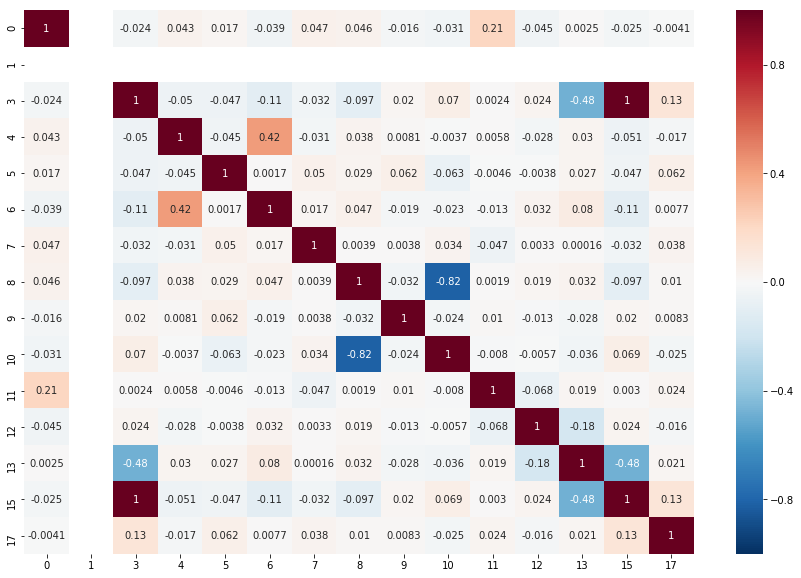

In [12]:
R = data.corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(R, vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

Посмотрим на корреляции по данным без пропусков, чтобы увидеть также корреляции с колонками, содержащими пропуски

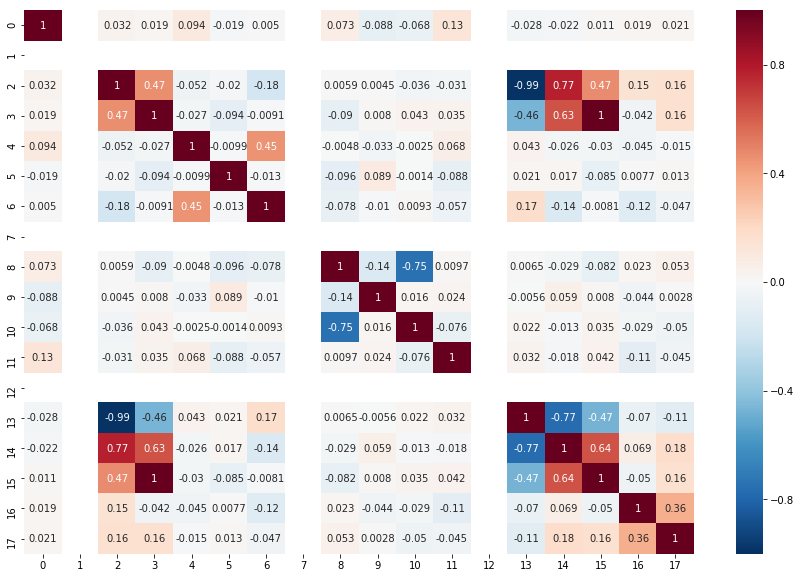

In [13]:
non_empty_data = []
for row in np.array(data):
    if '-' not in row:
        non_empty_data.append(row)
non_empty_data = pd.DataFrame(non_empty_data)

non_empty_data.iloc[:,2] = non_empty_data.iloc[:,2].astype(int)
non_empty_data.iloc[:,14] = non_empty_data.iloc[:,14].astype(int)
non_empty_data.iloc[:,16] = non_empty_data.iloc[:,16].astype(int)

R = non_empty_data.corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(R, vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

Видим, что многие признаки очень коррелируют меджу собой.

Посмотрим что там с первым признаком

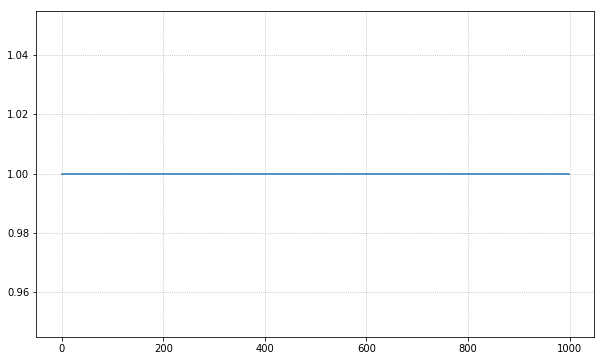

Unique elements of first column = [1]


In [113]:
plt.figure(figsize=(10, 6))
plt.plot(data.iloc[:,1])
plt.grid(ls=':')
plt.show()

print('Unique elements of first column = {}'.format(np.unique(data.iloc[:, 1])))

Видим, что столбец - константа, поэтому удалим его, только чуть позже, чтобы не запутаться в нумерации.

Теперь посмотрим на кол-во уникальных значений в остальных столбцах.

In [114]:
for column in data.columns:
    print('Count of unique elements in {} column = {}'.format(column, len(np.unique(data[column]))))

Count of unique elements in 0 column = 7
Count of unique elements in 1 column = 1
Count of unique elements in 2 column = 303
Count of unique elements in 3 column = 191
Count of unique elements in 4 column = 420
Count of unique elements in 5 column = 675
Count of unique elements in 6 column = 459
Count of unique elements in 7 column = 2
Count of unique elements in 8 column = 1000
Count of unique elements in 9 column = 7
Count of unique elements in 10 column = 56
Count of unique elements in 11 column = 7
Count of unique elements in 12 column = 2
Count of unique elements in 13 column = 967
Count of unique elements in 14 column = 22
Count of unique elements in 15 column = 191
Count of unique elements in 16 column = 218
Count of unique elements in 17 column = 25


Пока плохими кажутся только 7 и 12 признаки. Но оставим их пока.
Посмотрим на зависимость 15 и 3 признаков. Раннее обе коррелограммы показали корреляцию 1.

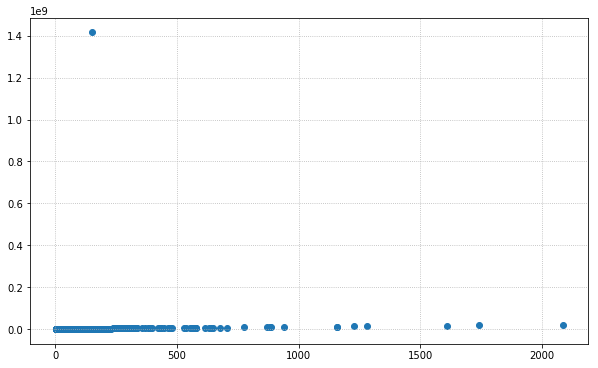

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:,3], data.iloc[:,15])
plt.grid(ls=':')
plt.show()

Видим выброс, найдем его место

In [120]:
np.where(np.array(data.iloc[:,15]) > 1000000000)

(array([623]),)

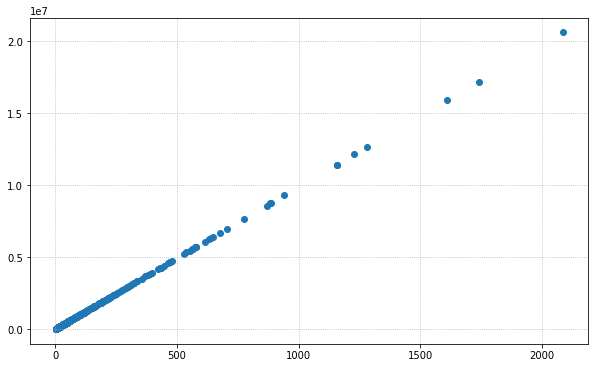

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(np.hstack((data.iloc[:,3][:623], data.iloc[:,3][624:])), 
            np.hstack((data.iloc[:,15][:623], data.iloc[:,15][624:])))
plt.grid(ls=':')
plt.show()



Да, видим, что один из признаков является вторым домноженным на константу. Поэтому также удалим один из них чуть позже. Кажется, что лучше удалять 15 признак - у него масштаб большой, это не очень удобно.

Чтобы найти коэффициент их зависимости построим линейную регрессию.


In [14]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()
reg.fit(np.hstack((data.iloc[:,3][:623], data.iloc[:,3][624:]))[:,np.newaxis], 
       np.hstack((data.iloc[:,15][:623], data.iloc[:,15][624:])))
reg.coef_, reg.intercept_

(array([9876.]), 1.0477378964424133e-09)

Получили, что признаки зависят примерно как : $feature_{15} = 9876 * feature_3 + 0$ <br>
Заметим, что если бы мы не убрали выброс, то коэффициенты сильно бы сдвинулись

Также посмотрим на 13 и 2 признаки - у них корреляция почти -1

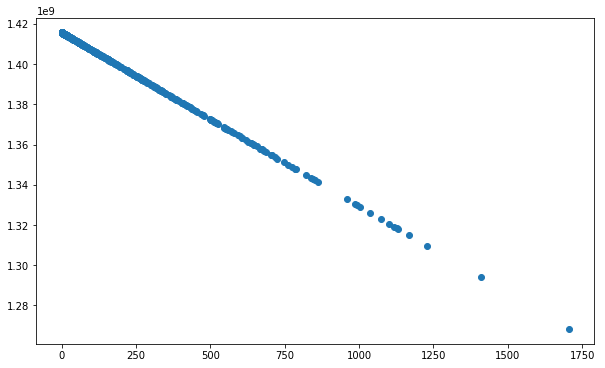

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:,2], data.iloc[:,13])
plt.show()

Линейная зависимость на лицо. Удалим признак 2.

Для определения вида зависимости опять построим линейную регрессию. Однако я бы не сказала, что признаки похожи на линейно зависимые

In [121]:
reg = LinearRegression()
reg.fit(data.iloc[:,2][good_ids][:,np.newaxis], data.iloc[:,13][good_ids])
reg.coef_, reg.intercept_

(array([-86443.61987114]), 1415677990.3023524)

Также посмотрим на 10 и 8 признаки

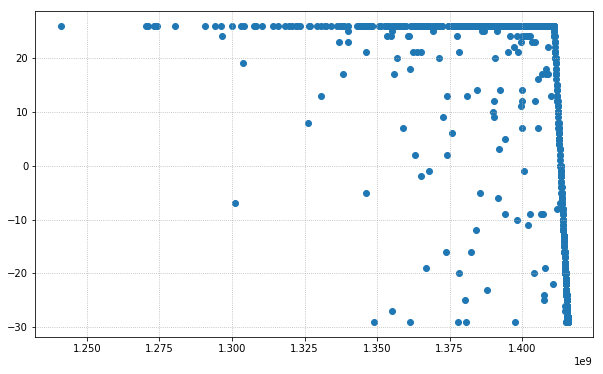

In [157]:
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:,8], data.iloc[:,10])
plt.grid(ls=':')
plt.show()

Ну, здесь конечно видна зависимость, однако все-таки признаки отличаются.

Посмотрим на распределение признаков с помощью kdeplot

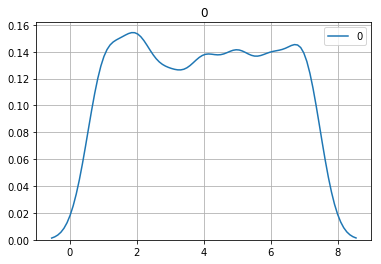

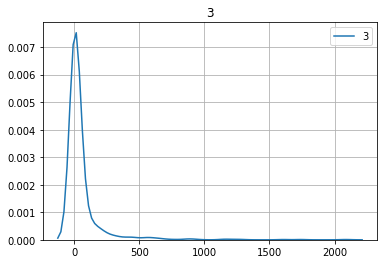

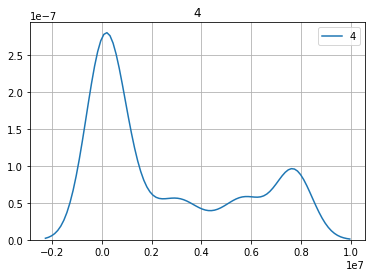

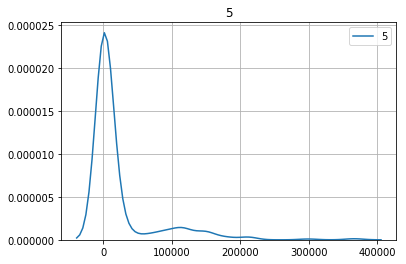

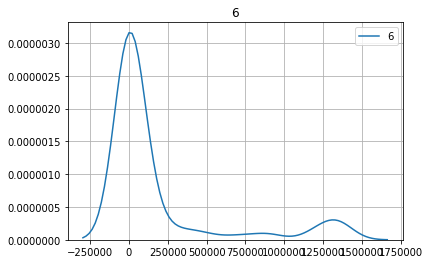

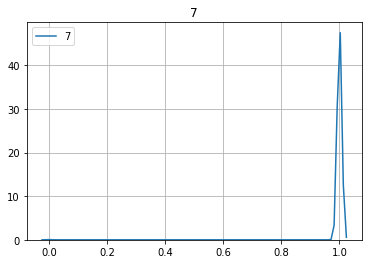

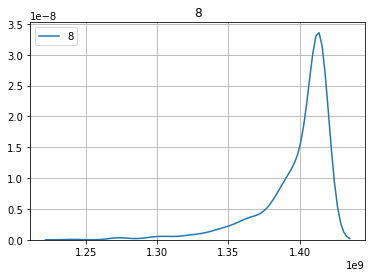

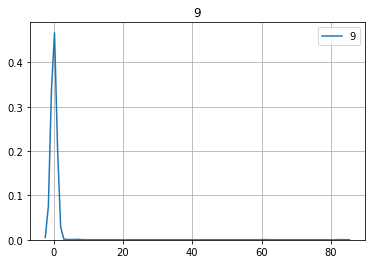

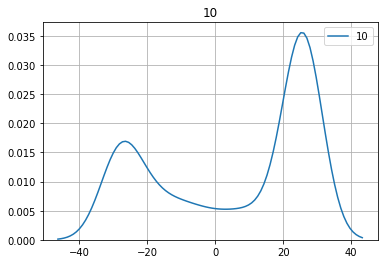

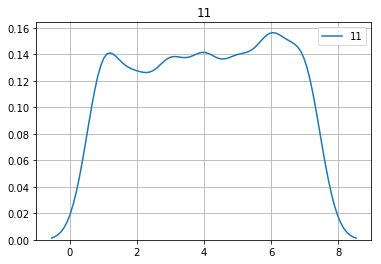

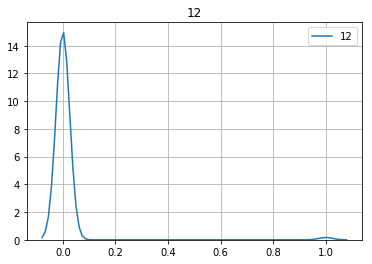

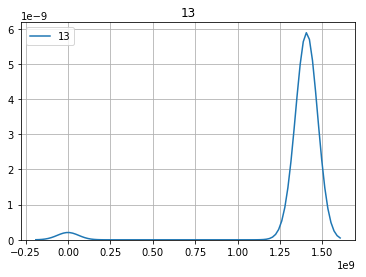

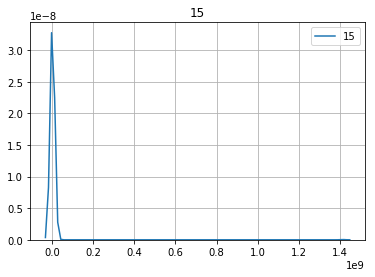

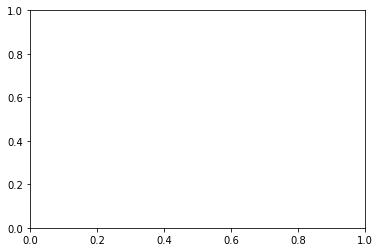

In [169]:
for i in range(18):
    try: 
        ax = sns.kdeplot(data.iloc[:, i])
        plt.grid()
        plt.title(i)
        plt.show()
    except BaseException:
        pass
    

Плохо выглядят признаки 7, 9, 12 и 15

Посмотрим на эти признаки и то, какие уникальные значения они принимают

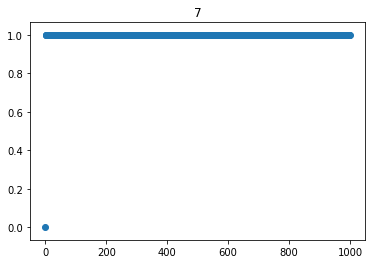

Unique elements and counts :  (array([0, 1]), array([  1, 999]))


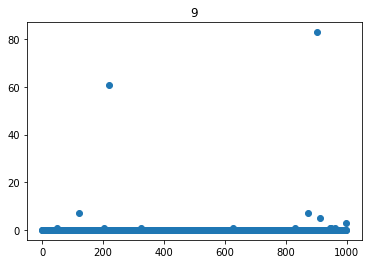

Unique elements and counts :  (array([ 0,  1,  3,  5,  7, 61, 83]), array([986,   8,   1,   1,   2,   1,   1]))


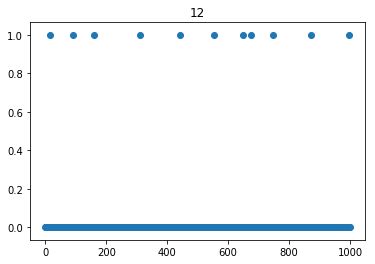

Unique elements and counts :  (array([0, 1]), array([989,  11]))


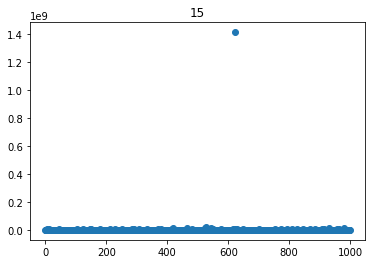

Unique elements and counts :  (array([      9876,      19752,      29628,      39504,      49380,
            59256,      69132,      79008,      88884,      98760,
           108636,     118512,     128388,     138264,     148140,
           158016,     167892,     177768,     187644,     197520,
           207396,     217272,     227148,     237024,     246900,
           256776,     266652,     276528,     286404,     296280,
           306156,     316032,     325908,     335784,     345660,
           355536,     365412,     375288,     385164,     404916,
           414792,     424668,     434544,     454296,     464172,
           474048,     493800,     503676,     513552,     523428,
           533304,     543180,     553056,     562932,     572808,
           582684,     592560,     602436,     612312,     632064,
           641940,     671568,     681444,     691320,     701196,
           711072,     730824,     750576,     760452,     790080,
           799956,     809832, 

In [175]:
plt.scatter(np.arange(1000), data.iloc[:, 7])
plt.title(7)
plt.show()
print('Unique elements and counts : ', np.unique(data.iloc[:, 7], return_counts=True))

plt.scatter(np.arange(1000), data.iloc[:, 9])
plt.title(9)
plt.show()
print('Unique elements and counts : ', np.unique(data.iloc[:, 9], return_counts=True))

plt.scatter(np.arange(1000), data.iloc[:, 12])
plt.title(12)
plt.show()
print('Unique elements and counts : ', np.unique(data.iloc[:, 12], return_counts=True))

plt.scatter(np.arange(1000), data.iloc[:, 15])
plt.title(15)
plt.show()
print('Unique elements and counts : ', np.unique(data.iloc[:, 15], return_counts=True))


Таакс, ну, видим, что 7 признак совсем не информативный. В принципе 9 и 12 признаки тоже не очень информативный, однако если у нас задача - поиск фрода, то этот признак может помочь. 15 признак хоть и принимает часто одно значение, однако он также принимает и много других значений, поэтому можно считать его информативным.

Также вернувшись к kdeplot-ам можно заметить, что графики ядерной оценки плотности для признака 0 и 1 очень похожи. Вспомним, что признак 11 - дни недели. Посмотрим на их гистограммы

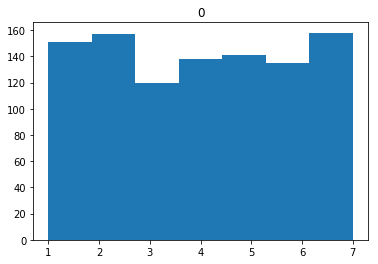

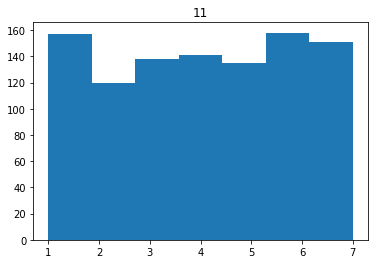

In [25]:
plt.hist(data.iloc[:,0], bins=7)
plt.title(0)
plt.show()

plt.hist(data.iloc[:,11], bins=7)
plt.title(11)
plt.show()

Видим, что признаки очень похож. Кроме того похоже не только распределение признаков, но и их значения. Кажется, что признак 0 -это сдвинутый на 1 признак 11. Проверим это

In [41]:
modified_zero = data.iloc[:,0] - 1
modified_zero[modified_zero == 0] = 7
(modified_zero == data.iloc[:,11]).sum()

1000

Да, так и есть. Поэтому также убираем признак 0.

Построим kdeplot для тех признаков, для которых не построилось.

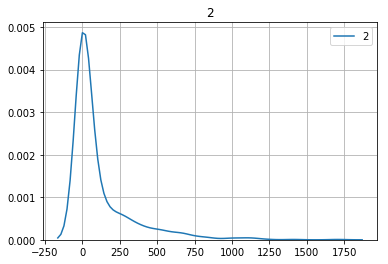

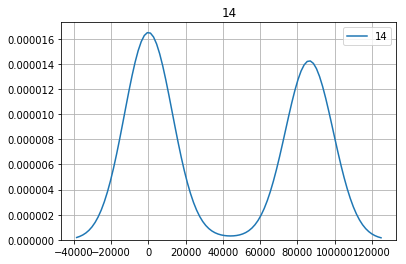

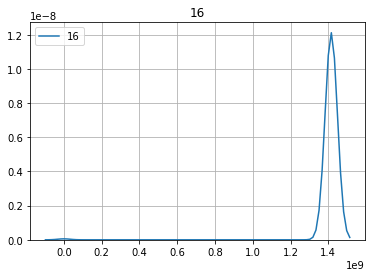

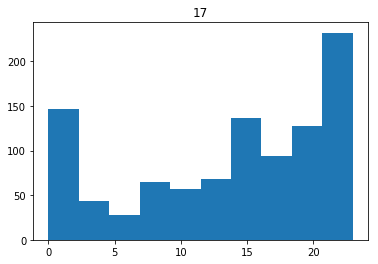

In [52]:
bad_indeces = [2, 14, 16, 17]

for i in bad_indeces:
    feature = data.iloc[:, i]
    
    try: 
        feature = feature[feature != '-']
        ax = sns.kdeplot(feature)
        plt.grid()
        plt.title(i)
        plt.show()
    except BaseException:
        plt.hist(feature)
        plt.title(i)
        plt.show()
    

Ядерная оценка плотности для 14 выглядит не очень. Посмотрим какие значения принимает этот столбец.

In [62]:
feature = data.iloc[:,14]
feature = feature[feature != '-']
feature = feature.astype(int)
print('count non empty features = ', len(feature))

count non empty features =  416


Непустых значений маловато. Посмотрим на сами значения.

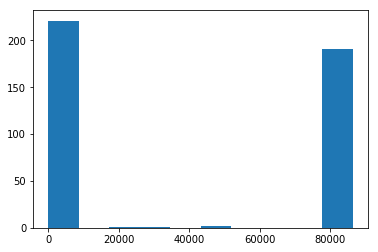

unique values and counts =  (array([    0,     1,     2,     3,     9,    10,    11,    12,    14,
          16,    21,    23,    31,    38,    52,   150, 23159, 27285,
       44828, 48291, 86401]), array([204,   1,   1,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1, 191]))


In [64]:
plt.hist(feature)
plt.show()
print('unique values and counts = ', np.unique(np.array(feature), return_counts=True))

По поводу этого признака получили, что больше половины - пропущенные значения, а остальные почти все либо 0 либо 86401. Также есть около 10 других объектов. Кажется, что такой признак неинформативен, однако если опять же думать про антифрод, то он возможно может помочь.

Смотрим на 16 признак

In [71]:
?plt.hist

count non empty features =  217


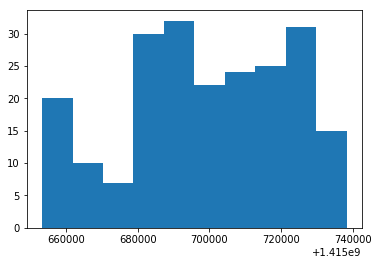

unique values and counts =  (array([        19, 1415653371, 1415653497, 1415653743, 1415654267,
       1415654283, 1415654497, 1415654545, 1415654624, 1415654674,
       1415654963, 1415654989, 1415655353, 1415656856, 1415656942,
       1415657193, 1415657214, 1415657598, 1415659567, 1415659909,
       1415661606, 1415662784, 1415662985, 1415664457, 1415665396,
       1415665478, 1415667122, 1415668509, 1415669285, 1415669489,
       1415670047, 1415671063, 1415672331, 1415674777, 1415675138,
       1415675982, 1415677565, 1415677802, 1415678953, 1415680003,
       1415681072, 1415681155, 1415681843, 1415682002, 1415682511,
       1415682565, 1415682676, 1415682685, 1415682707, 1415683037,
       1415683254, 1415683490, 1415683603, 1415684302, 1415684378,
       1415684684, 1415684821, 1415684881, 1415684961, 1415684978,
       1415684998, 1415685360, 1415685616, 1415686615, 1415686904,
       1415686920, 1415687011, 1415687242, 1415687453, 1415687498,
       1415687869, 1415688140, 14

In [81]:
feature = data.iloc[:,16]
feature = feature[feature != '-']
feature = feature.astype(int)
print('count non empty features = ', len(feature))

plt.hist(feature[feature !=19])
plt.show()
print('unique values and counts = ', np.unique(np.array(feature), return_counts=True))

Получили, что целых 80 % - пропущенные значения. Поэтому признак тоже не кажется слишком информативным. Онако с остальными значениями все более-менее нормально.

Так, напомню - мы решили выкинуть признаки 0, 1, 2,  15, 7. Возможно можно выкинуть признаки 14, 9 и 12.

Пришло время удалять столбцы!!

In [144]:
data.drop([0, 1, 2,  15, 7], axis=1, inplace=True)

Посмотрим на матрицу корреляций и матрицу частичных корреляций для оставшихся столбцов и сравним их. Значения - корреляция двух признаков после снятия линейной зависимости от всех остальных признаков.

In [145]:
from scipy.linalg import inv
def partial_corr(r12, r13, r23, n, dim=1):
    corr = (r12 - r13 * r23) / np.sqrt((1 - r13**2) * (1 - r23**2))
    stat = corr * np.sqrt(n - dim - 2) / np.sqrt(1 - corr**2)
    pvalue = 2 * sps.t(df=n-dim-2).sf(np.abs(stat))
    return corr, pvalue

def partial_corr_matrix(R):
    R_inv = inv(R)
    partial_corr = -R_inv \
                    / np.sqrt(np.diag(R_inv)[:, np.newaxis] \
                              * np.diag(R_inv)[np.newaxis, :])
    partial_corr = pd.DataFrame(partial_corr, index=R.index, columns=R.columns)
    return partial_corr

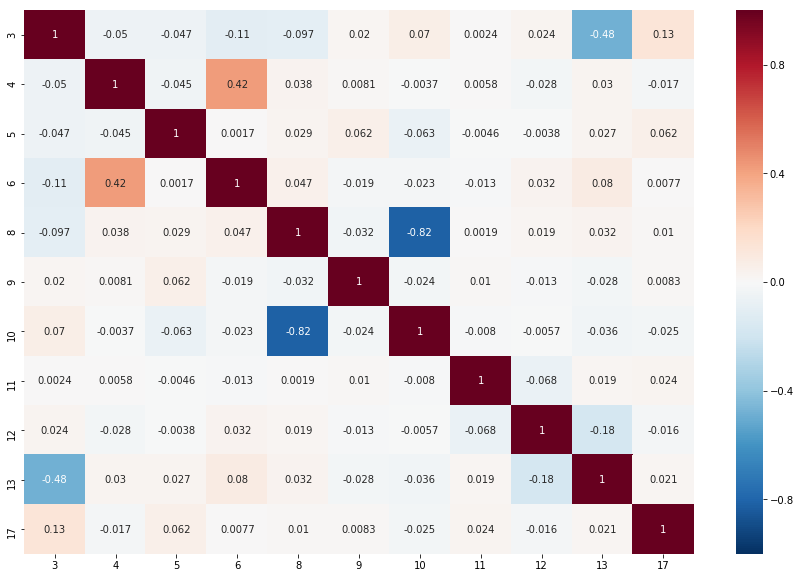

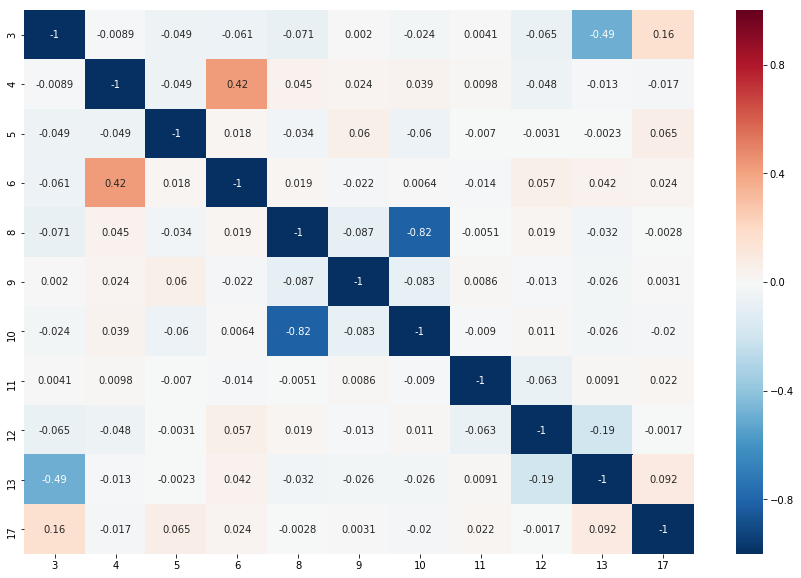

In [148]:
R = data.corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(R, vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

partial_R = partial_corr_matrix(R)
plt.figure(figsize=(15, 10))
sns.heatmap(partial_R, vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

Отсюда можем понять, что у нас скорей всего нет зависимости вида $feature_1 = a feature_2 + b feature_3 + c$ и более сложных

Посмотри на pairplot для оставшихся столбцов

In [150]:
# приводим к нормальным типам
feature_16 = data.iloc[:,-2]
feature_16[feature_16=='-'] = None
data.iloc[:,-2] = feature_16.astype(float)

feature_14 = data.iloc[:,-3]
feature_14[feature_14=='-'] = None
data.iloc[:,-3] = feature_14.astype(float)

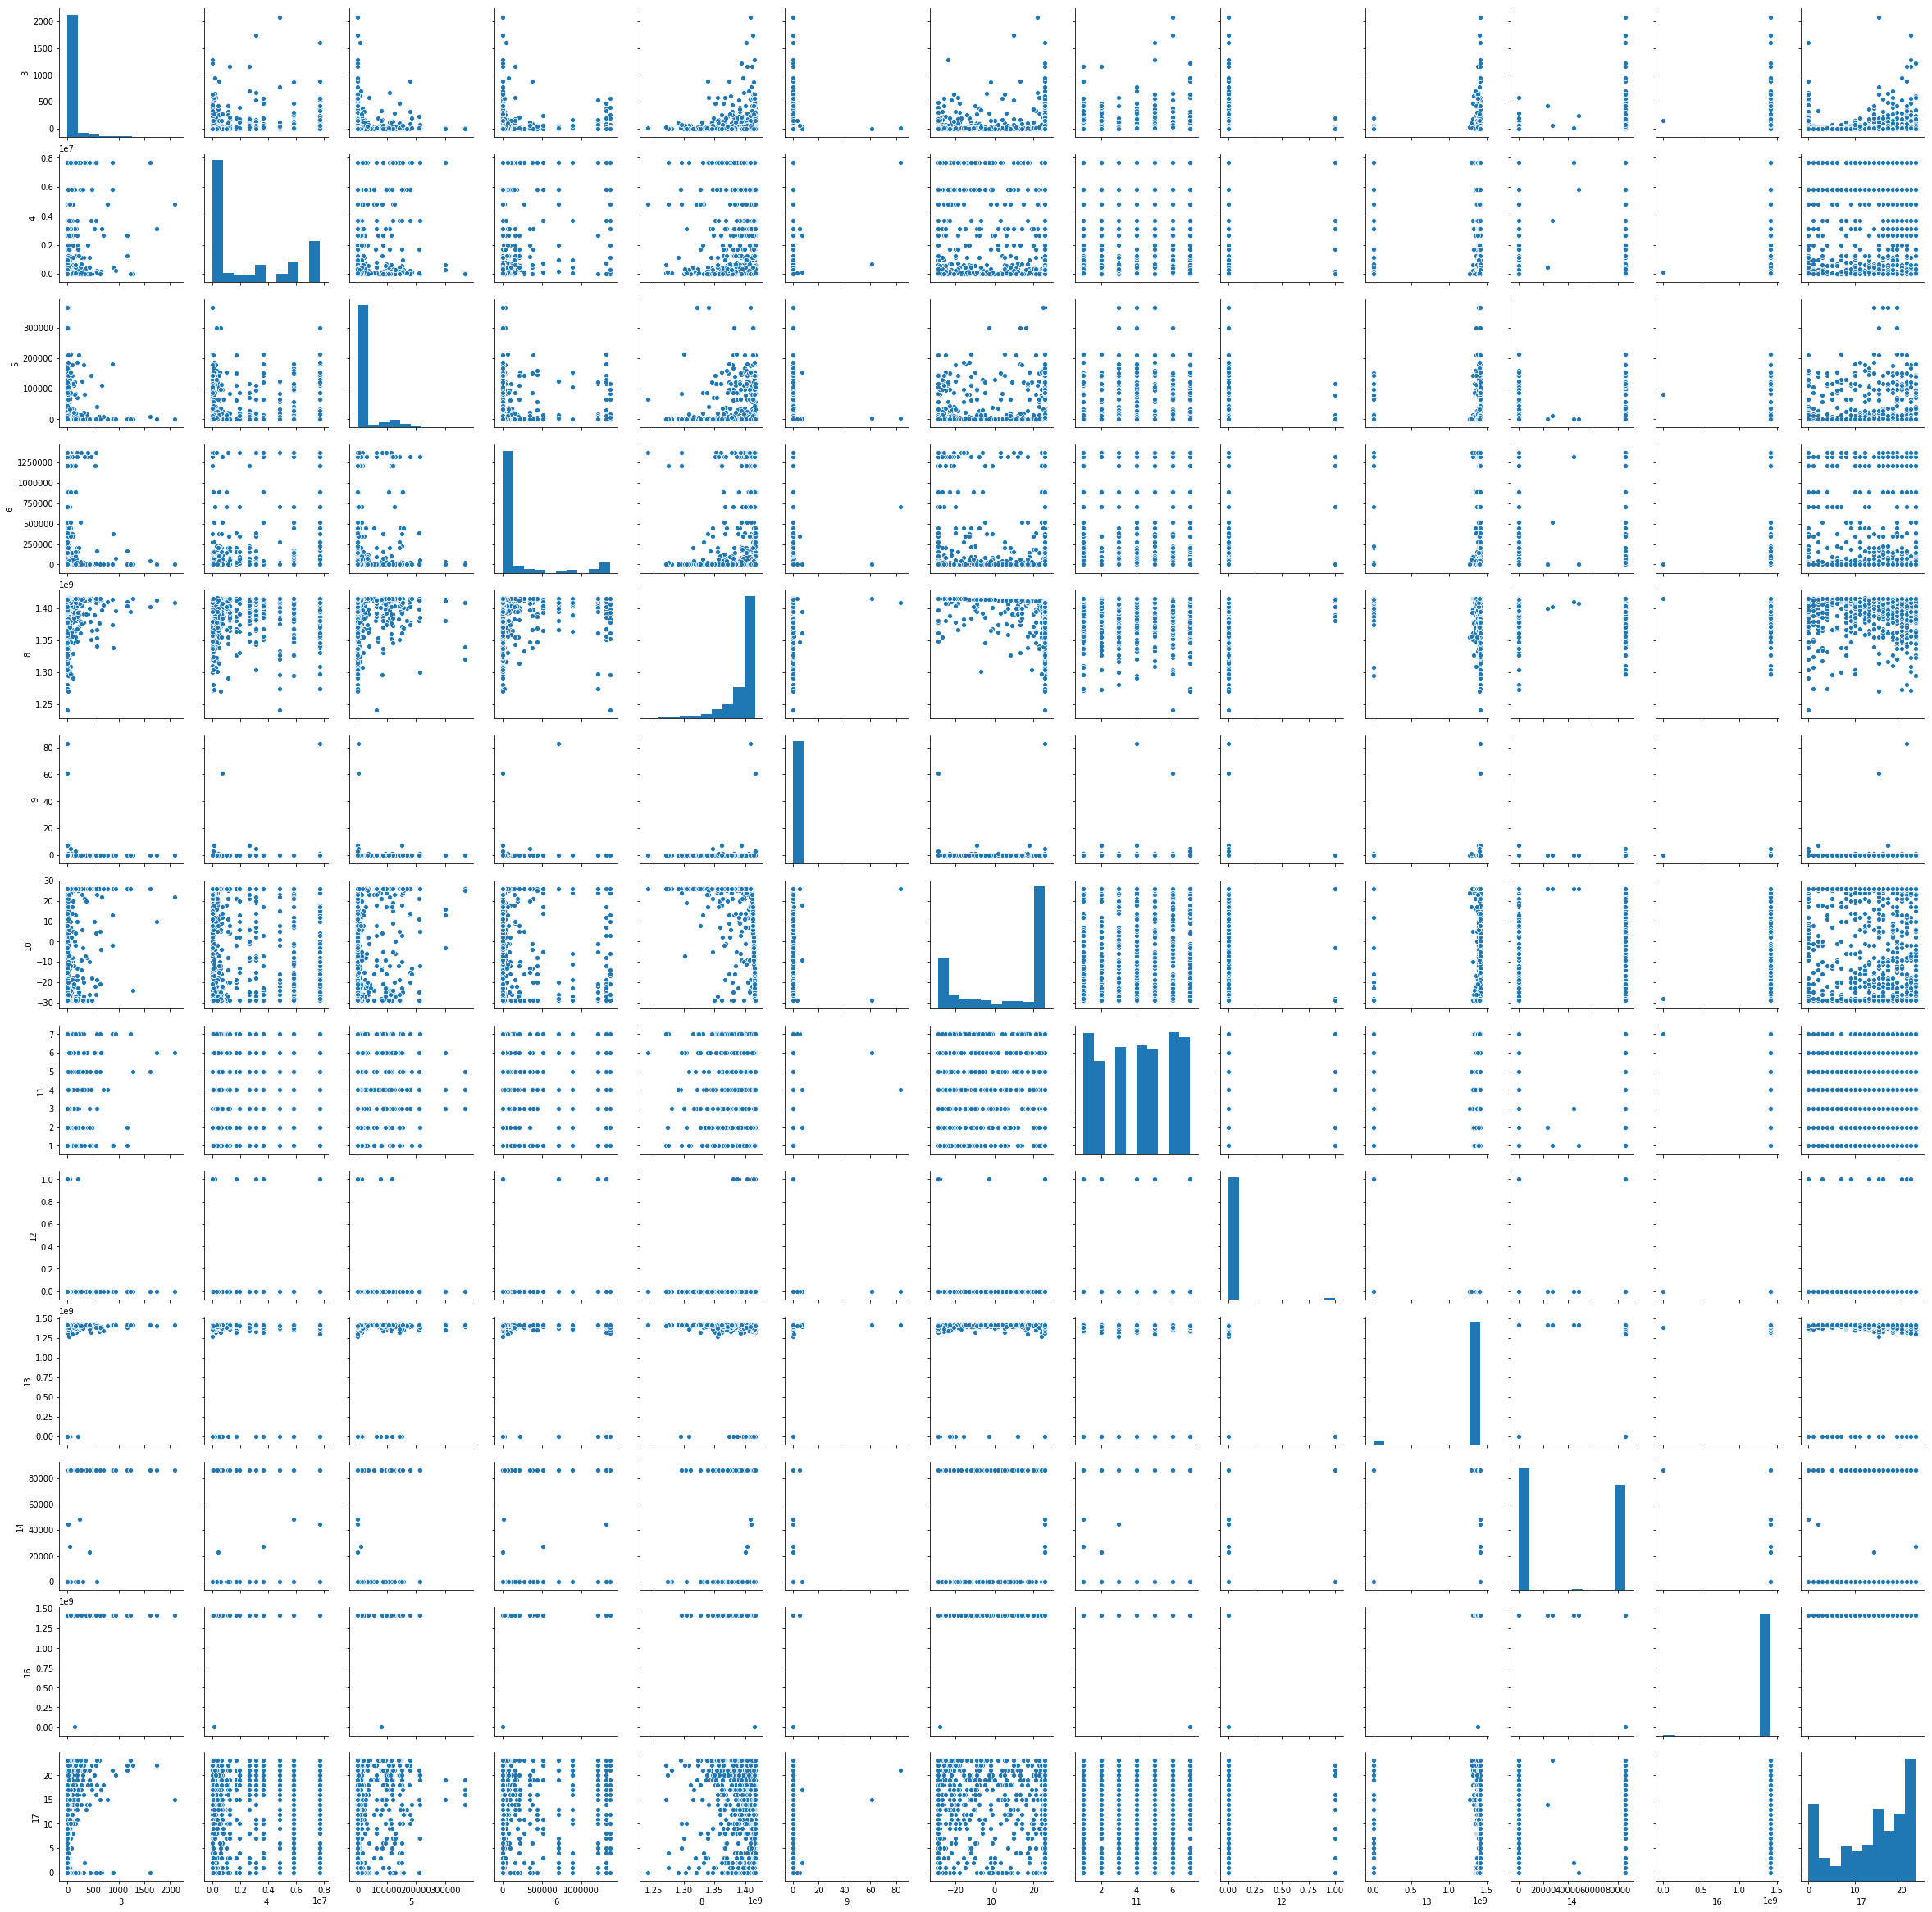

In [151]:
sns.pairplot(data)

Вроде все более-менее. Начнем применять PCA

In [152]:
from sklearn.decomposition import PCA

Заменим NaN-ы на что-нибудь

In [159]:
data.fillna(-1, inplace=True)

for n in range(1, 8):
    pca = PCA(n_components=n)
    pca.fit(np.array(data))
    print('{} components, explained variance = {}\n'.format(n, pca.explained_variance_ratio_))


1 components, explained variance = [0.84276516]

2 components, explained variance = [0.84276516 0.15557201]

3 components, explained variance = [0.84276516 0.15557201 0.00164016]

4 components, explained variance = [8.42765159e-01 1.55572008e-01 1.64016194e-03 2.23332826e-05]

5 components, explained variance = [8.42765159e-01 1.55572008e-01 1.64016194e-03 2.23332826e-05
 3.29234347e-07]

6 components, explained variance = [8.42765159e-01 1.55572008e-01 1.64016194e-03 2.23332826e-05
 3.29234347e-07 6.63325081e-09]

7 components, explained variance = [8.42765159e-01 1.55572008e-01 1.64016194e-03 2.23332826e-05
 3.29234347e-07 6.63325081e-09 1.38150803e-09]



Видим, что 2 компоненты способны выразить 99.8 % дисперсии, что очень много

## Задание 2

In [25]:
data = pd.read_csv('dataset_16_2', sep='\t', header=None)

In [26]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,df84cb4ecdf09e5ff08ccf605c93cd33,7eebdb49c85c7111eea1f3ca52fce8bc,1429627313,162,86401,25910,6,13,0,64,...,1,3,0,3,100,-,-,0,0,2
1,6ab6709af8922e1e9d9eac9d11646d1a,d5df093718f8f9b239376b1c136c75b1,1443635700,0,-,6971,8,10,-,0,...,-,-,-,-,-,-,-,-,-,2
2,e9f8a2dddd2445264d2db1b32e5c5c2b,f39c150ff0956f915d84e87d45f6c1e4,1443653041,0,-,1825,1,2,-,0,...,-,-,-,-,-,-,-,-,-,1
3,f3d2cb85a12f21887813cb3b22dbe7d0,6c2b4d3fbecd5f628db1090bba5bc537,1405667008,439,-,15,9,9,-,0,...,-,-,-,-,-,-,-,-,-,1
4,d6b99af7ab5d05b6c4277877f9d3af73,782094d9d0b65b59aa87456e788cd125,1430733562,150,86401,29562,13,21,0,17,...,-,0,0,-,-,-,-,0,-,1


Для начала обрежем первые 2 столбца, с ними мы ничего не сделаем

In [27]:
data = pd.DataFrame(np.array(data.drop([0, 1], axis=1)))
data.head()     

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1429627313,162,86401,25910,6,13,0,64,1,1,...,1,3,0,3,100,-,-,0,0,2
1,1443635700,0,-,6971,8,10,-,0,0,1,...,-,-,-,-,-,-,-,-,-,2
2,1443653041,0,-,1825,1,2,-,0,0,1,...,-,-,-,-,-,-,-,-,-,1
3,1405667008,439,-,15,9,9,-,0,0,1,...,-,-,-,-,-,-,-,-,-,1
4,1430733562,150,86401,29562,13,21,0,17,1,1,...,-,0,0,-,-,-,-,0,-,1


Посмотрим на типы столбцов и на кол-во уникальных элементов

In [177]:
for i, column in enumerate(data.columns):
    print('Type of elements in {} column = {}'.format(column, data.iloc[:,i].dtype))

Type of elements in 0 column = object
Type of elements in 1 column = object
Type of elements in 2 column = object
Type of elements in 3 column = object
Type of elements in 4 column = object
Type of elements in 5 column = object
Type of elements in 6 column = object
Type of elements in 7 column = object
Type of elements in 8 column = object
Type of elements in 9 column = object
Type of elements in 10 column = object
Type of elements in 11 column = object
Type of elements in 12 column = object
Type of elements in 13 column = object
Type of elements in 14 column = object
Type of elements in 15 column = object
Type of elements in 16 column = object
Type of elements in 17 column = object
Type of elements in 18 column = object
Type of elements in 19 column = object
Type of elements in 20 column = object
Type of elements in 21 column = object
Type of elements in 22 column = object
Type of elements in 23 column = object
Type of elements in 24 column = object
Type of elements in 25 column = obj

In [178]:
for i, column in enumerate(data.columns):
    print('Type of elements in {} column = {}'.format(column, len(np.unique(data[column]))))

Type of elements in 0 column = 9013
Type of elements in 1 column = 875
Type of elements in 2 column = 110
Type of elements in 3 column = 4031
Type of elements in 4 column = 24
Type of elements in 5 column = 24
Type of elements in 6 column = 15
Type of elements in 7 column = 307
Type of elements in 8 column = 2
Type of elements in 9 column = 2
Type of elements in 10 column = 2
Type of elements in 11 column = 56
Type of elements in 12 column = 56
Type of elements in 13 column = 57
Type of elements in 14 column = 54
Type of elements in 15 column = 57
Type of elements in 16 column = 56
Type of elements in 17 column = 47
Type of elements in 18 column = 59
Type of elements in 19 column = 17
Type of elements in 20 column = 46
Type of elements in 21 column = 23
Type of elements in 22 column = 28
Type of elements in 23 column = 24
Type of elements in 24 column = 7
Type of elements in 25 column = 42
Type of elements in 26 column = 1327
Type of elements in 27 column = 13
Type of elements in 28 co

Сразу заметим, что у нас очень много пропусков

In [188]:
for i, column in enumerate(data.columns):
    feature = data[column]
    print('NaN elements in {} column = {} %'.format(column, 100 * len(feature[feature=='-']) / len(feature)))


NaN elements in 0 column = 0.0 %
NaN elements in 1 column = 0.0 %
NaN elements in 2 column = 76.5061565523307 %
NaN elements in 3 column = 0.0 %
NaN elements in 4 column = 0.0 %
NaN elements in 5 column = 0.0 %
NaN elements in 6 column = 81.49736147757255 %
NaN elements in 7 column = 0.0 %
NaN elements in 8 column = 0.0 %
NaN elements in 9 column = 0.0 %
NaN elements in 10 column = 0.0 %
NaN elements in 11 column = 0.0 %
NaN elements in 12 column = 0.0 %
NaN elements in 13 column = 0.0 %
NaN elements in 14 column = 0.0 %
NaN elements in 15 column = 0.0 %
NaN elements in 16 column = 0.0 %
NaN elements in 17 column = 76.5061565523307 %
NaN elements in 18 column = 76.5061565523307 %
NaN elements in 19 column = 76.5061565523307 %
NaN elements in 20 column = 76.5061565523307 %
NaN elements in 21 column = 76.5061565523307 %
NaN elements in 22 column = 76.5061565523307 %
NaN elements in 23 column = 76.5061565523307 %
NaN elements in 24 column = 76.5061565523307 %
NaN elements in 25 column = 8

Ну, если пропусков больше 90, то удалим этот признак. 90 % - слишком много. Такими признаками оказались 29, 47, 48, 49, 51.

In [28]:
data = pd.DataFrame(np.array(data.drop([29, 47, 48, 49, 51], axis=1)))
data.head()     

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1429627313,162,86401,25910,6,13,0,64,1,1,...,368,0,0,5,1,3,0,3,0,2
1,1443635700,0,-,6971,8,10,-,0,0,1,...,-,-,-,-,-,-,-,-,-,2
2,1443653041,0,-,1825,1,2,-,0,0,1,...,-,-,-,-,-,-,-,-,-,1
3,1405667008,439,-,15,9,9,-,0,0,1,...,-,-,-,-,-,-,-,-,-,1
4,1430733562,150,86401,29562,13,21,0,17,1,1,...,-,0,0,-,-,0,0,-,0,1


Видим, что многие столбцы принимают небольшое кол-во - видимо у нас много категориальных признаков.

Посмотрим на корреляции

In [29]:
for col in data.columns:
    feature = np.array(data[col])
    if '-' in feature:
        feature[feature == '-'] = None
        data[col] = np.array(feature).astype(float)
    else:
        data[col] = np.array(feature).astype(int)

In [265]:
R = data.corr(method='spearman')
ind_i, ind_j = np.where(np.abs(R) > 0.7)
for i, j in zip(ind_i, ind_j):
    if i < j:
        print('features {} and {}, corr = {}'.format(i, j, R.iloc[i, j]))

features 0 and 1, corr = -0.9592392187160783
features 0 and 2, corr = -0.850566302557691
features 0 and 11, corr = -0.8692059075456878
features 0 and 12, corr = -0.8595353241759421
features 0 and 15, corr = -0.8088639220063215
features 1 and 2, corr = 0.8771455882850967
features 1 and 11, corr = 0.8963302663879378
features 1 and 12, corr = 0.8855931530045748
features 1 and 15, corr = 0.8305777679682278
features 2 and 3, corr = 0.8053308653834583
features 2 and 9, corr = 0.8287758487558936
features 2 and 11, corr = 0.884731901839439
features 2 and 12, corr = 0.8811226341173961
features 2 and 13, corr = 0.8483964264783664
features 2 and 15, corr = 0.8603941992990352
features 2 and 16, corr = 0.776712811020878
features 3 and 6, corr = 0.7183457864391379
features 3 and 45, corr = 0.7104550191613682
features 4 and 26, corr = 0.8391178407009854
features 6 and 7, corr = 0.70659894438888
features 6 and 30, corr = 0.7283769013933303
features 7 and 8, corr = 0.9884228923864291
features 7 and 13,

Удалим признак, чья корреляция с кем-нибудь больше, чем 0.93. Конечно, лучшы бы тут посмотреть на графики, но признаков слишком много и это будет очень долго.

In [30]:
data = pd.DataFrame(np.array(data.drop([0, 7, 10, 11, 15, 23, 30, 35, 43], axis=1)))
data.head()     

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,162.0,86401.0,25910.0,6.0,13.0,0.0,1.0,1.0,56.0,8.0,...,232.0,368.0,0.0,0.0,5.0,1.0,0.0,3.0,0.0,2.0
1,0.0,NaN,6971.0,8.0,10.0,NaN,0.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,0.0,NaN,1825.0,1.0,2.0,NaN,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,439.0,NaN,15.0,9.0,9.0,NaN,0.0,1.0,56.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,150.0,86401.0,29562.0,13.0,21.0,0.0,1.0,1.0,56.0,45.0,...,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0


Теперь анализ распределений.

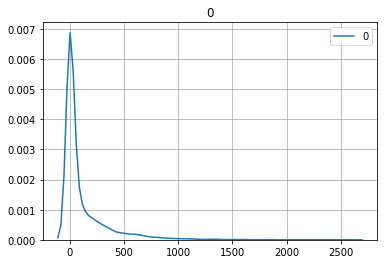

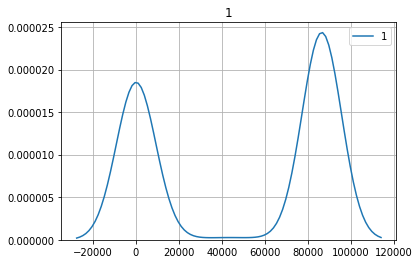

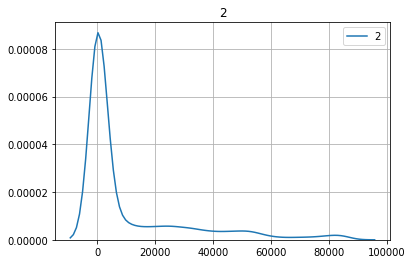

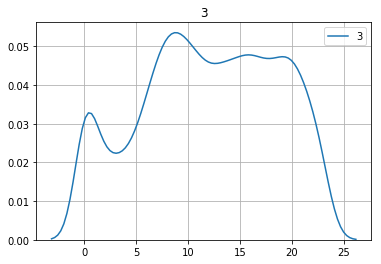

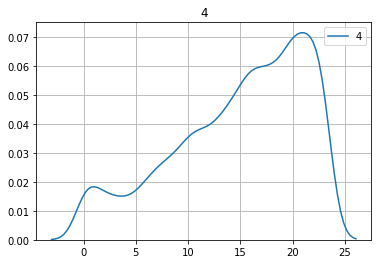

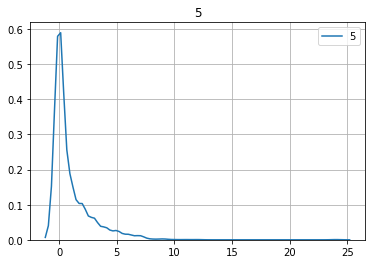

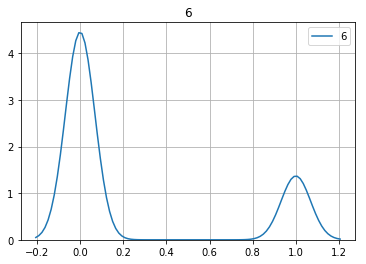

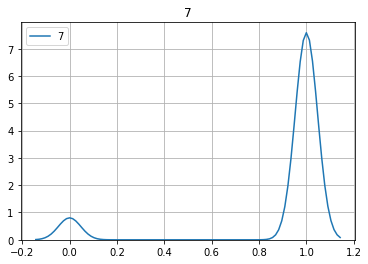

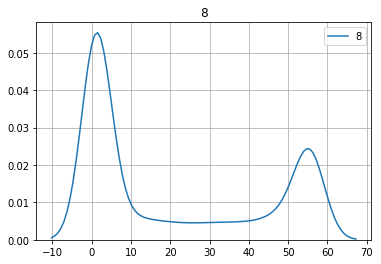

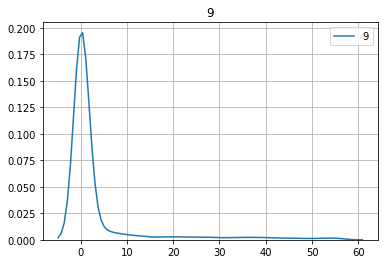

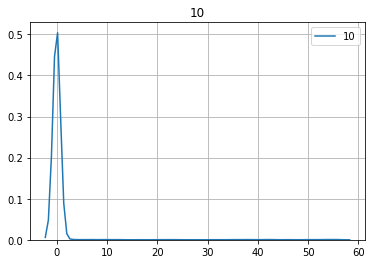

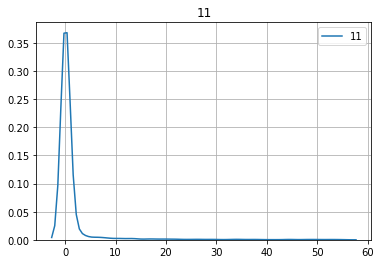

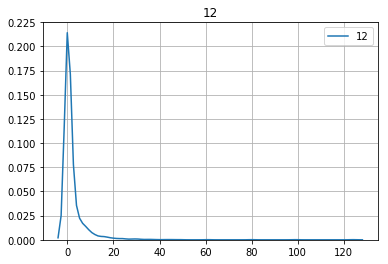

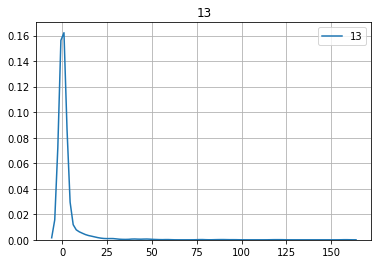

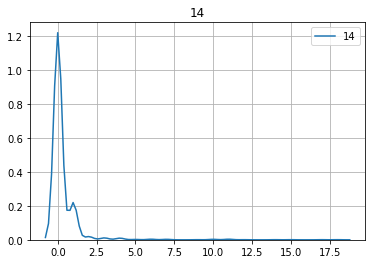

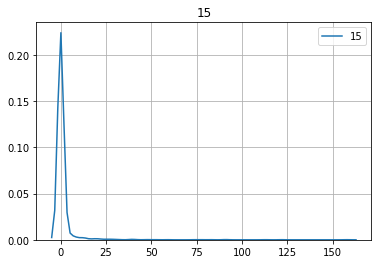

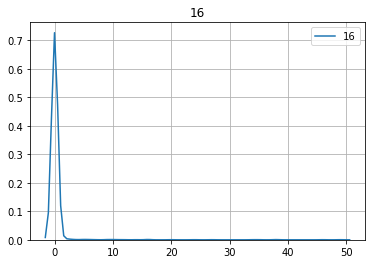

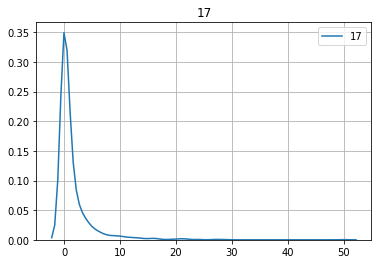

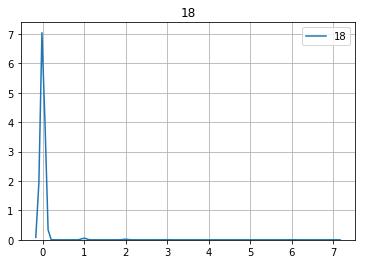

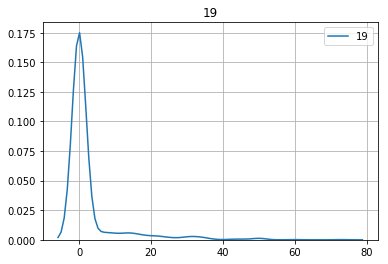

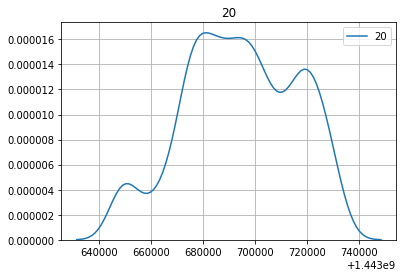

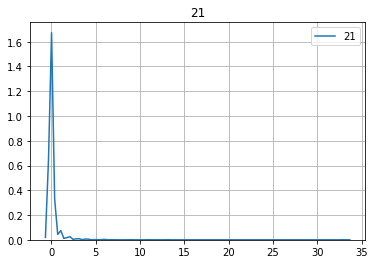

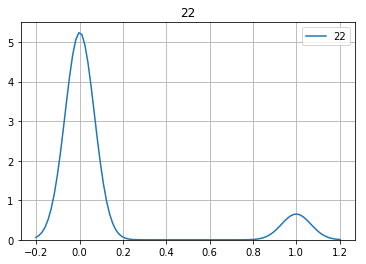

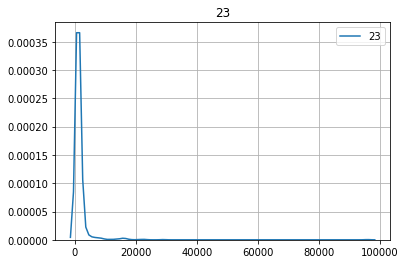

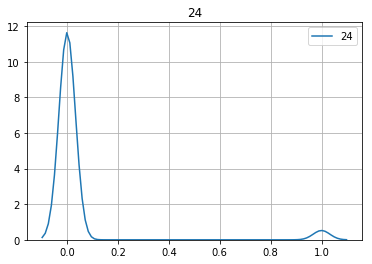

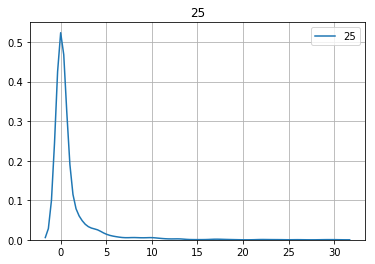

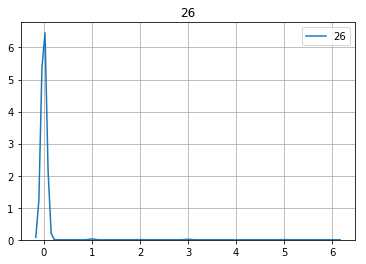

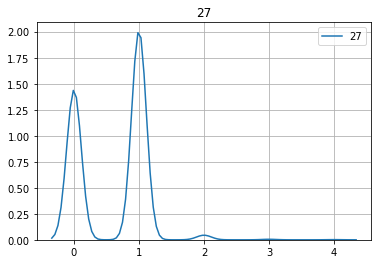

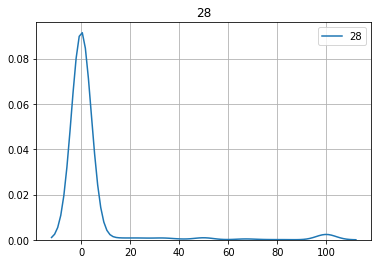

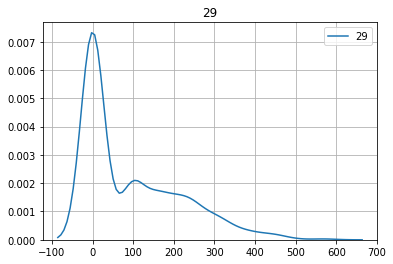

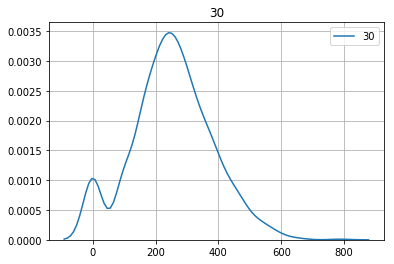

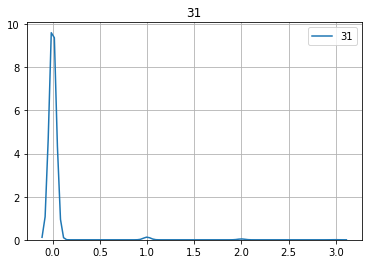

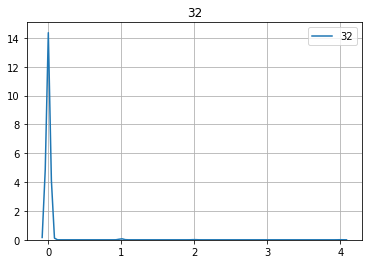

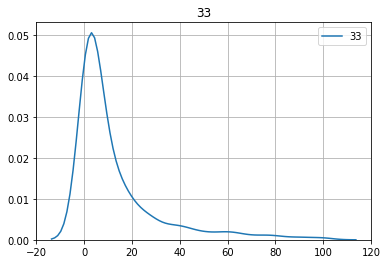

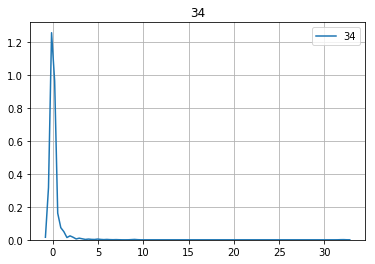

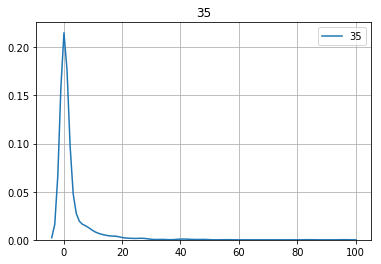

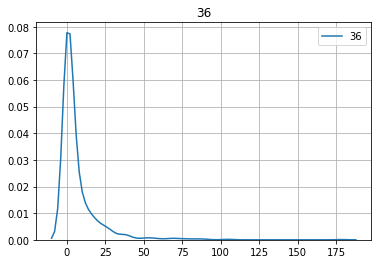

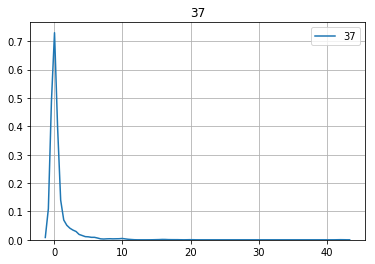

In [295]:
for i in range(38):
    try: 
        sns.kdeplot(data.iloc[:, i])
        plt.grid()
        plt.title(i)
        plt.show()
    except BaseException:
        try:
            feature = data.iloc[:, i]
            inds = np.where(np.isnan(feature) == False)[0]
            sns.kdeplot(feature[inds])
            plt.grid()
            plt.title(i)
            plt.show()
        except:
            plt.hist(data.iloc[:, i])
            plt.title(i)
            plt.show()
        

Заметим, что многие признаки имеют пик в 0 и вообще распределения многих признаков довольно похожи.

Плохими признаками кажутся 1, 16, 18, 26, 31, 32

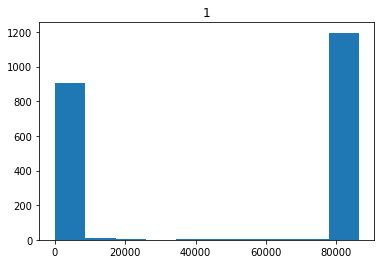

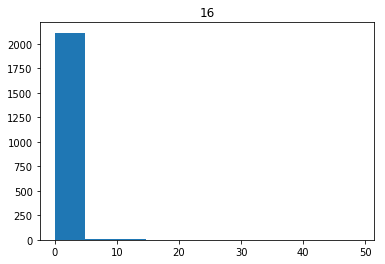

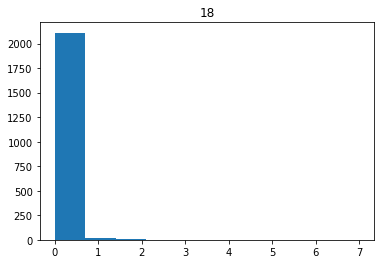

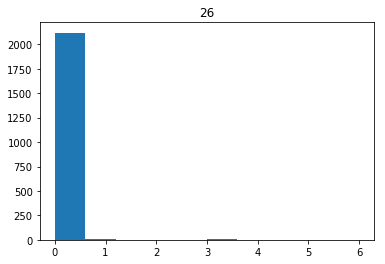

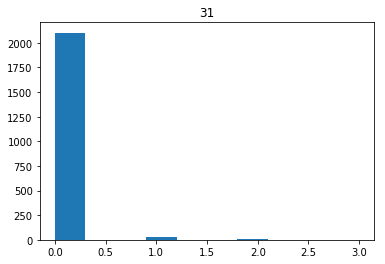

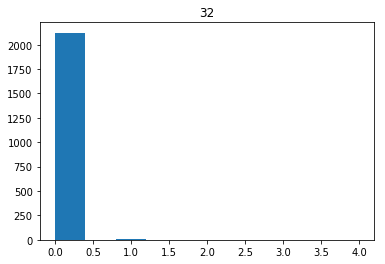

In [298]:
for f in [1, 16, 18, 26, 31, 32]:
    feature = data.iloc[:, f]
    try:
        inds = np.where(np.isnan(feature) == False)[0]
        feature = feature[inds]
        plt.hist(feature.astype(int))
        plt.title(f)
        plt.show()
    except:
        plt.hist(feature.astype(int))
        plt.title(f)
        plt.show()

Посмотрим на уникальные значения

In [ ]:
sns.pairplot(data);

In [ ]:
for n_comp in range(1, 8):
    

In [31]:
from sklearn.decomposition import PCA

data.fillna(-1, inplace=True)
pca = PCA(n_components=1)
pca.fit(np.array(data))
print('explained variance: ', pca.explained_variance_ratio_)
print(pca.components_)

explained variance:  [1.]
[[ 3.91044266e-08  3.54142200e-05  6.14725549e-06 -5.05413776e-10
   1.19360065e-09  1.43504112e-09  6.21169183e-10 -1.92602463e-10
   4.20023443e-09  9.53268822e-09  1.34095435e-09  3.65257795e-10
   3.05585777e-09  3.22332555e-09  9.96017646e-10  1.98109317e-09
   8.81436581e-10  1.88144449e-09  6.44499814e-10  2.57468145e-09
   9.99999999e-01  7.99001062e-10  7.43526245e-10  1.07917364e-06
   2.02719945e-10  1.63221591e-09  6.41032123e-10  1.18996265e-09
   3.36067808e-09  6.60296271e-08  1.74599089e-07  6.43981623e-10
   6.31019940e-10  7.92832830e-09  8.18134795e-10  3.31042421e-09
   5.28207761e-09  1.31548047e-09  1.56649145e-10]]


In [32]:
np.argsort(pca.components_[0])[::-1]

array([20,  1,  2, 23, 30, 29,  0,  9, 33, 36,  8, 28, 35, 13, 12, 19, 15,
       17, 25,  5, 10, 37,  4, 27, 14, 16, 34, 21, 22, 18, 31, 26, 32,  6,
       11, 24, 38,  7,  3])

Запомним первый несколько признаков - они вносят наибольший вклад в дисперсию и при обучении какой-либо модели нам стоит учитывать именно эти признаки.

Приступаем к поиску аномолий. Воспользуемся методом с лекции

In [37]:
# calculate abnormality
p1=[]
p5=[]
p95=[]
p99=[]

N, K = data.shape
for i in range(0,K):
    p1.append(np.percentile(data[i], 1))
    p5.append(np.percentile(data[i], 5))
    p95.append(np.percentile(data[i], 95))
    p99.append(np.percentile(data[i], 99))


abnormality = {}
for i in range(0, N):
    abnormality[i]=0
    for j in range(0, K):
        c = data.iloc[i, j]        
        # 1 point of abnormalito for getting into top or bottom 5%
        # +2 extra points of abnormality for getting into top or bottom 1%
        abnormality[i] += 2*(c < p1[j]) + (c < p5[j]) + (c > p95[j]) + 2*(c > p99[j])

#print some top abnormality examples
abn_sorted = sorted(abnormality.items(), key=lambda x: x[1], reverse = True)

for k, v in abn_sorted[:10]:
    print(k, v)

1471 47
8075 45
97 44
2039 42
5039 42
4421 41
3577 40
6092 40
8821 40
1459 39


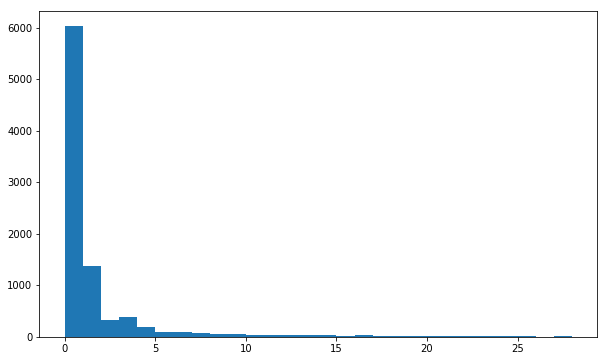

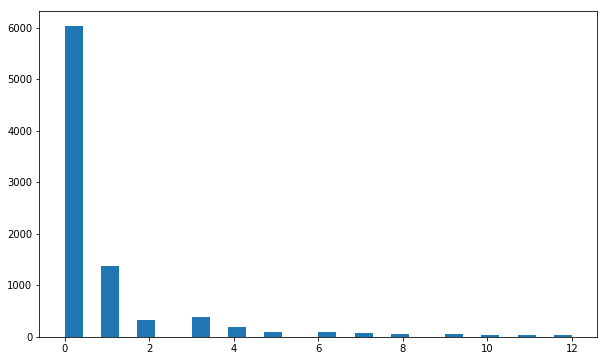

In [45]:
plt.figure(figsize=(10,6))
plt.hist(list(abnormality.values()), 28, range=[0,28])
plt.show()

plt.figure(figsize=(10,6))
plt.hist(list(abnormality.values()), 28, range=[0,12])
plt.show()

In [48]:
# average abnormality 
print(np.mean(list(abnormality.values())), np.std(list(abnormality.values())))

1.5869613016710642 4.439335219007125


Если считать аномальными всех, кто заработал больше, чем 5 очков, то получим кол-во аномалий, равное 707

In [55]:
print('count = {}, percent = {} % of objects with abnormality'.format(np.sum(np.array(list(abnormality.values())) > 5), 
      100 * np.sum(np.array(list(abnormality.values())) > 5) / len(list(abnormality.values()))))

count = 707, percent = 7.772647317502199 % of objects with abnormality


Теперь кластеризуем

In [84]:
from sklearn.cluster import KMeans
nclusters = 8
kmeans = KMeans(n_clusters=nclusters, max_iter=100).fit(data)
centroid = kmeans.cluster_centers_
label = kmeans.labels_

small trick, explained below
def truevar(x): 
    return np.var(x)

cluster_df = pd.DataFrame(list(zip(list(abnormality.values()), label)), 
                          columns = ['abn', 'cluster_id'])

cluster_stats = cluster_df.pivot_table(
    index='cluster_id',
    values='abn',
    aggfunc=[len, np.mean, np.std, np.var]

)

cluster_stats



,len,mean,std,var
,abn,abn,abn,abn
cluster_id,,,,
0,6002,0.202433,0.538942,0.290459
1,265,9.569811,8.487281,72.033934
2,480,4.289583,4.329524,18.744776
3,356,1.780899,2.266045,5.134958
4,531,1.241055,1.250770,1.564425
5,252,16.464286,10.048226,100.966847
6,339,8.451327,6.856075,47.005760
7,871,0.365098,0.840018,0.705631


Посчитаем дисперсию значения анамальности внутри кластера.

In [102]:
# calculate within-cluster variance and % of total variance explained
cluster_stats2 = cluster_stats
cluster_stats2['var_in_cluster'] = np.array(cluster_stats2['var'] * cluster_stats2['len']) / np.sum(np.array(cluster_stats2['len']))
totvar = np.var(list(abnormality.values()))

cluster_stats2['var_in_cluster_%'] = cluster_stats2['var_in_cluster'] / totvar

print('total abnormality variance: %s' % totvar)
print('abnormality variance explained by between-cluster variance: %.2f%%' % ((1-sum(cluster_stats2['var_in_cluster_%'])) *100 ))
print('abnormality variance left inside clusters: %.2f%%' % (sum(cluster_stats2['var_in_cluster_%']) *100 ))

cluster_stats2

total abnormality variance: 19.707697186717038
abnormality variance explained by between-cluster variance: 58.45%
abnormality variance left inside clusters: 41.55%


,len,mean,std,var,var_in_cluster,var_in_cluster_%
,abn,abn,abn,abn,,
cluster_id,,,,,,
0,6002,0.202433,0.538942,0.290459,0.191660,0.009725
1,265,9.569811,8.487281,72.033934,2.098614,0.106487
2,480,4.289583,4.329524,18.744776,0.989170,0.050192
3,356,1.780899,2.266045,5.134958,0.200972,0.010198
4,531,1.241055,1.250770,1.564425,0.091327,0.004634
5,252,16.464286,10.048226,100.966847,2.797235,0.141936
6,339,8.451327,6.856075,47.005760,1.751864,0.088892
7,871,0.365098,0.840018,0.705631,0.067569,0.003429


Получаем, что самое большое значение аномальности в кластерах с номерами 5, 1, 6. Однако, получаем, что и внутрекластерная дисперсия значения аномальности больше, чем в остальных. И все таки кажется, что значения аналомальности в этих кластерах сильно больше, особенно в 5. Так что кажется, чт можно считать кластер 5 аномальным.